In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [189]:
train = pd.read_csv('/content/boston_train.csv')
test = pd.read_csv('/content/boston_test.csv')

In [190]:
train_df = train.copy()
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [191]:
test_df = test.copy()
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [180]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1454 non-null   int64  
 1   LotFrontage    1454 non-null   float64
 2   LotArea        1454 non-null   int64  
 3   MasVnrArea     1454 non-null   float64
 4   BsmtFinSF1     1454 non-null   int64  
 5   BsmtUnfSF      1454 non-null   int64  
 6   BedroomAbvGr   1454 non-null   int64  
 7   KitchenAbvGr   1454 non-null   int64  
 8   TotRmsAbvGrd   1454 non-null   int64  
 9   Fireplaces     1454 non-null   int64  
 10  GarageYrBlt    1454 non-null   float64
 11  GarageCars     1454 non-null   int64  
 12  GarageArea     1454 non-null   int64  
 13  EnclosedPorch  1454 non-null   int64  
 14  Porch_3Ssn     1454 non-null   int64  
 15  ScreenPorch    1454 non-null   int64  
 16  New_var1       1454 non-null   int64  
 17  New_var2       1454 non-null   int64  
 18  New_var3

In [26]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

In [27]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,TA,Y,0,0,0,NaN,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,0,0,0,NaN,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,TA,Y,272,0,0,NaN,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,TA,Y,0,0,0,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,TA,Y,0,0,0,NaN,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,TA,Y,0,0,0,MnPrv,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,TA,Y,0,0,0,GdPrv,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,TA,Y,112,0,0,NaN,WD,Normal,142125


In [28]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,...,730.0,TA,TA,Y,0,0,120,MnPrv,WD,Normal
1,1462,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,...,312.0,TA,TA,Y,0,0,0,NaN,WD,Normal
2,1463,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,...,482.0,TA,TA,Y,0,0,0,MnPrv,WD,Normal
3,1464,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,...,470.0,TA,TA,Y,0,0,0,NaN,WD,Normal
4,1465,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,...,506.0,TA,TA,Y,0,0,144,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,...,0.0,NaN,NaN,Y,0,0,0,NaN,WD,Normal
1455,2916,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,...,286.0,TA,TA,Y,0,0,0,NaN,WD,Abnorml
1456,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,...,576.0,TA,TA,Y,0,0,0,NaN,WD,Abnorml
1457,2918,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,...,0.0,NaN,NaN,Y,0,0,0,MnPrv,WD,Normal


In [47]:
#Train 데이터 범주형 변수 더미화
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

#Test 데이터 데이터 범주형 변수 더미화
dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
Y = pd.concat([test_df, dummies], axis = 1)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 241 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(27), uint8(211)
memory usage: 643.2 KB


In [49]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 234 entries, Id to SaleCondition_Partial
dtypes: float64(10), int64(19), uint8(205)
memory usage: 622.8 KB


In [ ]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
Y

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
#Train 데이터 Missing 값 처리
cols=list(train_df)
for col in list(train_df):
    if (train_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols))
#3개

#Test 데이터 Missing 값 처리
cols=list(test_df)
for col in list(test_df):
    if (test_df[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(len(cols))
#10개

3
10


In [51]:
#Train 데이터 Missing값 처리
for col in ('LotFrontage', 'MasVnrArea', 'GarageYrBlt'):
    train_df[col] = train_df[col].fillna(0)

#Test 데이터 Missing값 처리
for col in ('BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'):
    test_df[col] = test_df[col].fillna(0)

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  FlrSF_1st      1460 non-null   int64  
 13  FlrSF_2nd      1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [53]:
data = train_df.drop('SalePrice', axis=1).values
target = train_df['SalePrice'].values

In [54]:
from sklearn.linear_model import Lasso

In [55]:
Lasso = Lasso()
Lasso.fit(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [56]:
predict = Lasso.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [57]:
predict

array([116000.06051324, 150052.72174397, 170008.21162133, ...,
       165016.14668529, 114794.9690557 , 252108.14189729])

In [ ]:
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train_df = train.copy()
test_df = test.copy()

In [192]:
train_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

test_df.drop(['Street','Alley','Utilities','Condition2','RoofMatl','BsmtFinType2',
'BsmtFinSF2','Heating','LowQualFinSF','WoodDeckSF','OpenPorchSF',
'PoolArea','PoolQC','MiscFeature','MiscVal','MoSold','YrSold'], axis = 'columns', inplace=True)

<ipython-input-193-d7f8f20f5cbd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax1)
<ipython-input-193-d7f8f20f5cbd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['SalePrice']), fit=stats.norm, ax=ax2)


<Axes: xlabel='SalePrice', ylabel='Density'>

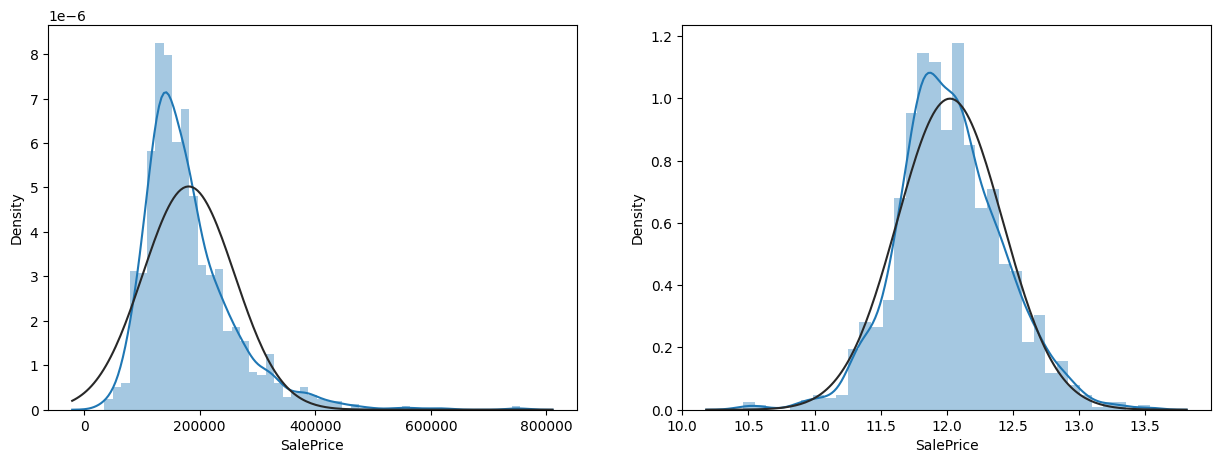

In [193]:
#Target 변수 확인
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,5)
sns.distplot(train_df['SalePrice'], fit=stats.norm, ax=ax1)
sns.distplot(np.log(train_df['SalePrice']), fit=stats.norm, ax=ax2)

In [194]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = train_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [195]:
train_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [196]:
train_df['New_var1']

0       19
1       20
2       19
3       18
4       20
        ..
1455    17
1456    18
1457    25
1458    17
1459    18
Name: New_var1, Length: 1460, dtype: int64

In [197]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0,0,0,NaN,WD,Normal,181500,20
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,272,0,0,NaN,WD,Abnorml,140000,18
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0,0,0,NaN,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0,0,0,NaN,WD,Normal,175000,17
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0,0,0,MnPrv,WD,Normal,210000,18
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0,0,0,GdPrv,WD,Normal,266500,25
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,112,0,0,NaN,WD,Normal,142125,17


In [198]:
Condition_var = ['OverallQual','OverallCond','ExterQual','ExterCond']
Condition_Ex = test_df[Condition_var]

Condition_Ex = Condition_Ex.replace(to_replace='Ex',value = 5)
Condition_Ex = Condition_Ex.replace(to_replace='Gd',value = 4)
Condition_Ex = Condition_Ex.replace(to_replace='TA',value = 3)
Condition_Ex = Condition_Ex.replace(to_replace='Fa',value = 2)
Condition_Ex = Condition_Ex.replace(to_replace='Po',value = 1)
Condition_Ex = Condition_Ex.replace(to_replace='None',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='',value = 0)
Condition_Ex = Condition_Ex.replace(to_replace='NA',value = 0)

In [199]:
test_df['New_var1'] = Condition_Ex['OverallQual'] + Condition_Ex['OverallCond'] + Condition_Ex['ExterQual'] + Condition_Ex['ExterCond']

In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior

In [201]:
train_df=train_df.drop(train_df[(train_df['TotalBsmtSF'] > 4000) | (train_df['FlrSF_1st'] > 300000) | (train_df['FlrSF_2nd'] > 1700) | (train_df['GrLivArea'] > 4000)].index)

In [202]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,208500,19
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,0,0,0,NaN,WD,Normal,181500,20
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,0,0,0,NaN,WD,Normal,223500,19
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,272,0,0,NaN,WD,Abnorml,140000,18
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,0,0,0,NaN,WD,Normal,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,TA,Y,0,0,0,NaN,WD,Normal,175000,17
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,TA,Y,0,0,0,MnPrv,WD,Normal,210000,18
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,TA,Y,0,0,0,GdPrv,WD,Normal,266500,25
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,TA,Y,112,0,0,NaN,WD,Normal,142125,17


In [203]:
train_df['New_var2'] = train_df['TotalBsmtSF'] + train_df['FlrSF_1st'] + train_df['FlrSF_2nd'] + train_df['GrLivArea']
test_df['New_var2'] = test_df['TotalBsmtSF'] + test_df['FlrSF_1st'] + test_df['FlrSF_2nd'] + test_df['GrLivArea']

In [204]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,EnclosedPorch,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1,New_var2
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,0,0,0,NaN,WD,Normal,208500,19,4276
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,Y,0,0,0,NaN,WD,Normal,181500,20,3786
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,0,0,0,NaN,WD,Normal,223500,19,4492
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,Y,272,0,0,NaN,WD,Abnorml,140000,18,4190
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,0,0,0,NaN,WD,Normal,250000,20,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,Y,0,0,0,NaN,WD,Normal,175000,17,4247
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,Y,0,0,0,MnPrv,WD,Normal,210000,18,5688
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,Y,0,0,0,GdPrv,WD,Normal,266500,25,5832
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,Y,112,0,0,NaN,WD,Normal,142125,17,3234


In [205]:
train_df['New_var3'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']/2 + train_df['FullBath'] + train_df['HalfBath']/2
test_df['New_var3'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']/2 + test_df['FullBath'] + test_df['HalfBath']/2

In [206]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = train_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = train_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

train_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

In [207]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Porch_3Ssn,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,New_var1,New_var2,New_var3,New_var4
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,NaN,WD,Normal,208500,19,4276,3.5,12.0
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,NaN,WD,Normal,181500,20,3786,2.5,14.0
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,NaN,WD,Normal,223500,19,4492,3.5,13.0
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,NaN,WD,Abnorml,140000,18,4190,2.0,11.0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,NaN,WD,Normal,250000,20,5541,3.5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,NaN,WD,Normal,175000,17,4247,2.5,9.0
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,MnPrv,WD,Normal,210000,18,5688,3.0,11.0
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,GdPrv,WD,Normal,266500,25,5832,2.0,12.0
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,NaN,WD,Normal,142125,17,3234,2.0,12.0


In [208]:
Under_Cond_var1 = ['BsmtQual','BsmtCond']
Under_Cond_Ex1 = test_df[Under_Cond_var1]

Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Ex',value = 5)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Gd',value = 4)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='TA',value = 3)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Fa',value = 2)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='Po',value = 1)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='None',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='',value = 0)
Under_Cond_Ex1 = Under_Cond_Ex1.replace(to_replace='NA',value = 0)

Under_Cond_var2 = ['BsmtExposure','BsmtFinType1']
Under_Cond_Ex2 = test_df[Under_Cond_var2]

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Gd',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Av',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Mn',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='No',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='None',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='',value = 0)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='NA',value = 0)

Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='GLQ',value = 4)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='ALQ',value = 3)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='BLQ',value = 2)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Rec',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='LwQ',value = 1)
Under_Cond_Ex2 = Under_Cond_Ex2.replace(to_replace='Unf',value = 1)

test_df['New_var4'] = Under_Cond_Ex1['BsmtQual'] + Under_Cond_Ex1['BsmtCond'] +Under_Cond_Ex2['BsmtExposure'] + Under_Cond_Ex2['BsmtFinType1']

In [209]:
Land_var = ['LotShape','LandContour']
Land_Ex = train_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

train_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

In [210]:
Land_var = ['LotShape','LandContour']
Land_Ex = test_df[Land_var]

Land_Ex = Land_Ex.replace(to_replace='IR1',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR2',value = 0)
Land_Ex = Land_Ex.replace(to_replace='IR3',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Reg',value = 1)

Land_Ex = Land_Ex.replace(to_replace='None',value = 0)
Land_Ex = Land_Ex.replace(to_replace='',value = 0)
Land_Ex = Land_Ex.replace(to_replace='NA',value = 0)

Land_Ex = Land_Ex.replace(to_replace='Bnk',value = 0)
Land_Ex = Land_Ex.replace(to_replace='HLS',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Low',value = 0)
Land_Ex = Land_Ex.replace(to_replace='Lvl',value = 1)

test_df['New_var5'] = Land_Ex['LotShape'] + Land_Ex['LandContour']

In [211]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = train_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

train_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

In [212]:
Garage_var = ['GarageFinish','GarageQual','GarageCond']
Garage_Ex = test_df[Garage_var]

Garage_Ex = Garage_Ex.replace(to_replace='Ex',value = 5)
Garage_Ex = Garage_Ex.replace(to_replace='Gd',value = 4)
Garage_Ex = Garage_Ex.replace(to_replace='TA',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='Fa',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Po',value = 1)
Garage_Ex = Garage_Ex.replace(to_replace='None',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='',value = 0)
Garage_Ex = Garage_Ex.replace(to_replace='NA',value = 0)

Garage_Ex = Garage_Ex.replace(to_replace='Fin',value = 3)
Garage_Ex = Garage_Ex.replace(to_replace='RFn',value = 2)
Garage_Ex = Garage_Ex.replace(to_replace='Unf',value = 1)

In [213]:
test_df['New_var6'] = Garage_Ex['GarageFinish'] + Garage_Ex['GarageQual'] + Garage_Ex['GarageCond']

In [214]:
train_df['New_var7'] = ((2020 - train_df['YearBuilt']) + (2020 - train_df['YearRemodAdd'])) / 2
test_df['New_var7'] = ((2020 - test_df['YearBuilt']) + (2020 - test_df['YearRemodAdd'])) / 2

In [215]:
# Train 파생변수 관련 변수 제외
train_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [216]:
# Test 파생변수 관련 변수 제외
test_df.drop(['OverallQual','OverallCond','ExterQual','ExterCond',
               'TotalBsmtSF','FlrSF_1st','FlrSF_2nd','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
               'LotShape','LandContour',
               'GarageFinish','GarageQual','GarageCond',
               'YearBuilt','YearRemodAdd','Electrical'], axis = 'columns', inplace=True)

In [217]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    train_df[col] = train_df[col].fillna('None')
,
for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    train_df[col] = train_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    train_df[col] = train_df[col].fillna(test_df[col].mode()[0])

In [218]:
for col in ('MasVnrType','FireplaceQu','GarageType','Fence'):
    test_df[col] = test_df[col].fillna('None')

for col in ('New_var1','New_var2','New_var3','New_var4','New_var5','New_var6','New_var7', 'LotFrontage','MasVnrArea','GarageYrBlt', 'BsmtFinSF1' ,'GarageCars', 'GarageArea', 'BsmtUnfSF'):
    test_df[col] = test_df[col].fillna(0)

for col in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [219]:
dummy_list = list(train_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(train_df[dummy_list], prefix = dummy_list)
train_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([train_df, dummies], axis = 1)

dummy_list = list(test_df.select_dtypes(include =['object']).columns)
dummies = pd.get_dummies(test_df[dummy_list], prefix = dummy_list)
test_df.drop(dummy_list, axis = 1, inplace = True)
X = pd.concat([test_df, dummies], axis = 1)

In [220]:
train_target = train_df['SalePrice']
train_df = train_df[list(test_df)]
train_target = np.log(train_target)

In [221]:
train_df.drop(columns="Id",inplace=True)
test_df.drop(columns="Id",inplace=True)

<ipython-input-221-d278f545bc32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns="Id",inplace=True)


# Modeling

In [222]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

## Lasso cv

In [125]:
Lasso = Lasso()
# Lasso.fit(train_df, train_target)

In [126]:
from sklearn.model_selection import cross_val_score

k = 10
scores = -cross_val_score(Lasso, train_df, train_target, cv=k, scoring='neg_mean_squared_error')

# RMSE 계산
rmse = np.sqrt(scores.mean())

print(f'Average RMSE: {rmse}')

Average RMSE: 0.1671567670242015


## Linear & cv

In [128]:
lr_model = LinearRegression()
lr_model.fit(train_df, train_target)

LinearRegression()

In [147]:
y_pred = lr_model.predict(train_df)
r2 = r2_score(train_target, y_pred)
print('R-sqaure:', r2)

R-sqaure: 0.8964392985975919


In [130]:
k = 10
scores = -cross_val_score(lr_model, train_df, train_target, cv=k, scoring='neg_mean_squared_error')

# RMSE 계산
rmse = np.sqrt(scores.mean())

print(f'Average RMSE: {rmse}')

Average RMSE: 0.12965968212150564


In [165]:
train_cols = list(train_df.columns)

In [164]:
import statsmodels.api as sm

# 모델 훈련
lr_model.fit(train_df, train_target)

# 회귀계수 출력
coefficients = lr_model.coef_
intercept = lr_model.intercept_
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(train_df.columns, coefficients):
    print(f"{feature}: {coef}")

# 회귀모델 통계적 정보 출력
X_with_intercept = sm.add_constant(train_df)  # 상수항(intercept)을 추가한 입력 데이터
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

Intercept: 10.622045533967038
Coefficients:
MSSubClass: -0.0003715755892274296
LotFrontage: 0.00026701931546347117
LotArea: 1.9954263395237327e-06
MasVnrArea: 2.9266555157253143e-05
BsmtFinSF1: 5.472967168678521e-05
BsmtUnfSF: -9.802981992785692e-06
BedroomAbvGr: -0.009457049901323216
KitchenAbvGr: -0.06254754680281614
TotRmsAbvGrd: 0.008680634869748344
Fireplaces: 0.04003423321097504
GarageYrBlt: -2.694375171983181e-05
GarageCars: 0.033829307654509165
GarageArea: 8.011254448521198e-05
EnclosedPorch: 5.5209430242082574e-05
Porch_3Ssn: 0.00010257825133689324
ScreenPorch: 0.00021703842219325837
New_var1: 0.04253147133111767
New_var2: 0.0001314637332599287
New_var3: 0.023483888219979883
New_var4: 0.005575024621617906
New_var5: -0.017964652752661736
New_var6: 0.014765876656204968
New_var7: -0.004080200592101138
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                 

In [166]:
train_cols.remove('BsmtUnfSF')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     562.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:35:37   Log-Likelihood:                 937.93
No. Observations:                1454   AIC:                            -1830.
Df Residuals:                    1431   BIC:                            -1708.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.6188      0.050    211.974

In [167]:
train_cols.remove('Porch_3Ssn')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     589.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:35:58   Log-Likelihood:                 937.54
No. Observations:                1454   AIC:                            -1831.
Df Residuals:                    1432   BIC:                            -1715.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.6194      0.050    212.020

In [168]:
train_cols.remove('EnclosedPorch')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     619.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:36:15   Log-Likelihood:                 937.12
No. Observations:                1454   AIC:                            -1832.
Df Residuals:                    1433   BIC:                            -1721.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6154      0.050    212.762   

In [169]:
train_cols.remove('MasVnrArea')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     651.5
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:36:44   Log-Likelihood:                 936.32
No. Observations:                1454   AIC:                            -1833.
Df Residuals:                    1434   BIC:                            -1727.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6146      0.050    212.721   

In [170]:
train_cols.remove('GarageYrBlt')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     687.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:37:35   Log-Likelihood:                 935.28
No. Observations:                1454   AIC:                            -1833.
Df Residuals:                    1435   BIC:                            -1732.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6118      0.050    212.757   

In [171]:
train_cols.remove('BedroomAbvGr')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     726.3
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:38:21   Log-Likelihood:                 933.84
No. Observations:                1454   AIC:                            -1832.
Df Residuals:                    1436   BIC:                            -1737.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5994      0.049    214.713   

In [172]:
train_cols.remove('TotRmsAbvGrd')

lr_model.fit(train_df[train_cols], train_target)

X_with_intercept = sm.add_constant(train_df[train_cols])
sm_model = sm.OLS(train_target, X_with_intercept)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     770.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:38:40   Log-Likelihood:                 932.57
No. Observations:                1454   AIC:                            -1831.
Df Residuals:                    1437   BIC:                            -1741.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6040      0.049    215.061   

In [175]:
predict = lr_model.predict(test_df[train_cols])
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_lr2.csv', index=False)

## v2

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_df)
X_train_scaled = scaler.transform(train_df)
X_test_scaled = scaler.transform(test_df)

In [150]:
train_df.corr()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,EnclosedPorch,Porch_3Ssn,ScreenPorch,New_var1,New_var2,New_var3,New_var4,New_var5,New_var6,New_var7
MSSubClass,1.000000,-0.221696,-0.142924,0.023676,-0.075239,-0.141701,-0.023764,0.281883,0.039630,-0.046602,...,-0.011844,-0.043765,-0.025888,-0.017232,-0.026379,0.152176,0.061766,0.103425,-0.073012,-0.037166
LotFrontage,-0.221696,1.000000,0.066592,0.072587,0.002134,0.164694,0.141422,0.037762,0.197710,0.017582,...,0.032230,0.025453,0.026686,0.091107,0.192146,0.054175,0.035160,0.126567,0.042638,-0.050749
LotArea,-0.142924,0.066592,1.000000,0.069371,0.170863,-0.004830,0.116780,-0.016115,0.169570,0.258997,...,-0.015313,0.021830,0.046366,0.063580,0.259178,0.185206,0.118165,-0.290486,0.105500,-0.007078
MasVnrArea,0.023676,0.072587,0.069371,1.000000,0.225079,0.114414,0.094076,-0.037119,0.259870,0.236433,...,-0.109511,0.021544,0.068566,0.267327,0.403635,0.292931,0.237881,-0.041966,0.215441,-0.284798
BsmtFinSF1,-0.075239,0.002134,0.170863,0.225079,1.000000,-0.526458,-0.124226,-0.082719,0.000098,0.236258,...,-0.102976,0.030036,0.070394,0.168627,0.258092,0.470910,0.558869,-0.124009,0.208929,-0.218057
BsmtUnfSF,-0.141701,0.164694,-0.004830,0.114414,-0.526458,1.000000,0.166754,0.030561,0.250138,0.051048,...,-0.001847,0.021033,-0.012083,0.190168,0.354550,-0.108779,-0.036081,0.004544,0.060254,-0.183398
BedroomAbvGr,-0.023764,0.141422,0.116780,0.094076,-0.124226,0.166754,1.000000,0.199696,0.679682,0.103393,...,0.042820,-0.024154,0.045264,0.063193,0.454523,0.230024,-0.132356,-0.042260,-0.011592,0.067792
KitchenAbvGr,0.281883,0.037762,-0.016115,-0.037119,-0.082719,0.030561,0.199696,1.000000,0.261590,-0.123546,...,0.037012,-0.024705,-0.051862,-0.212275,0.067778,0.041081,-0.254520,0.060319,-0.208847,0.183611
TotRmsAbvGrd,0.039630,0.197710,0.169570,0.259870,0.000098,0.250138,0.679682,0.261590,1.000000,0.314923,...,0.007889,-0.005579,0.062939,0.309990,0.765086,0.446448,0.047006,-0.106948,0.163484,-0.146003
Fireplaces,-0.046602,0.017582,0.258997,0.236433,0.236258,0.051048,0.103393,-0.123546,0.314923,1.000000,...,-0.022591,0.012143,0.187941,0.304725,0.482190,0.320807,0.214315,-0.192391,0.286209,-0.144701


<Axes: >

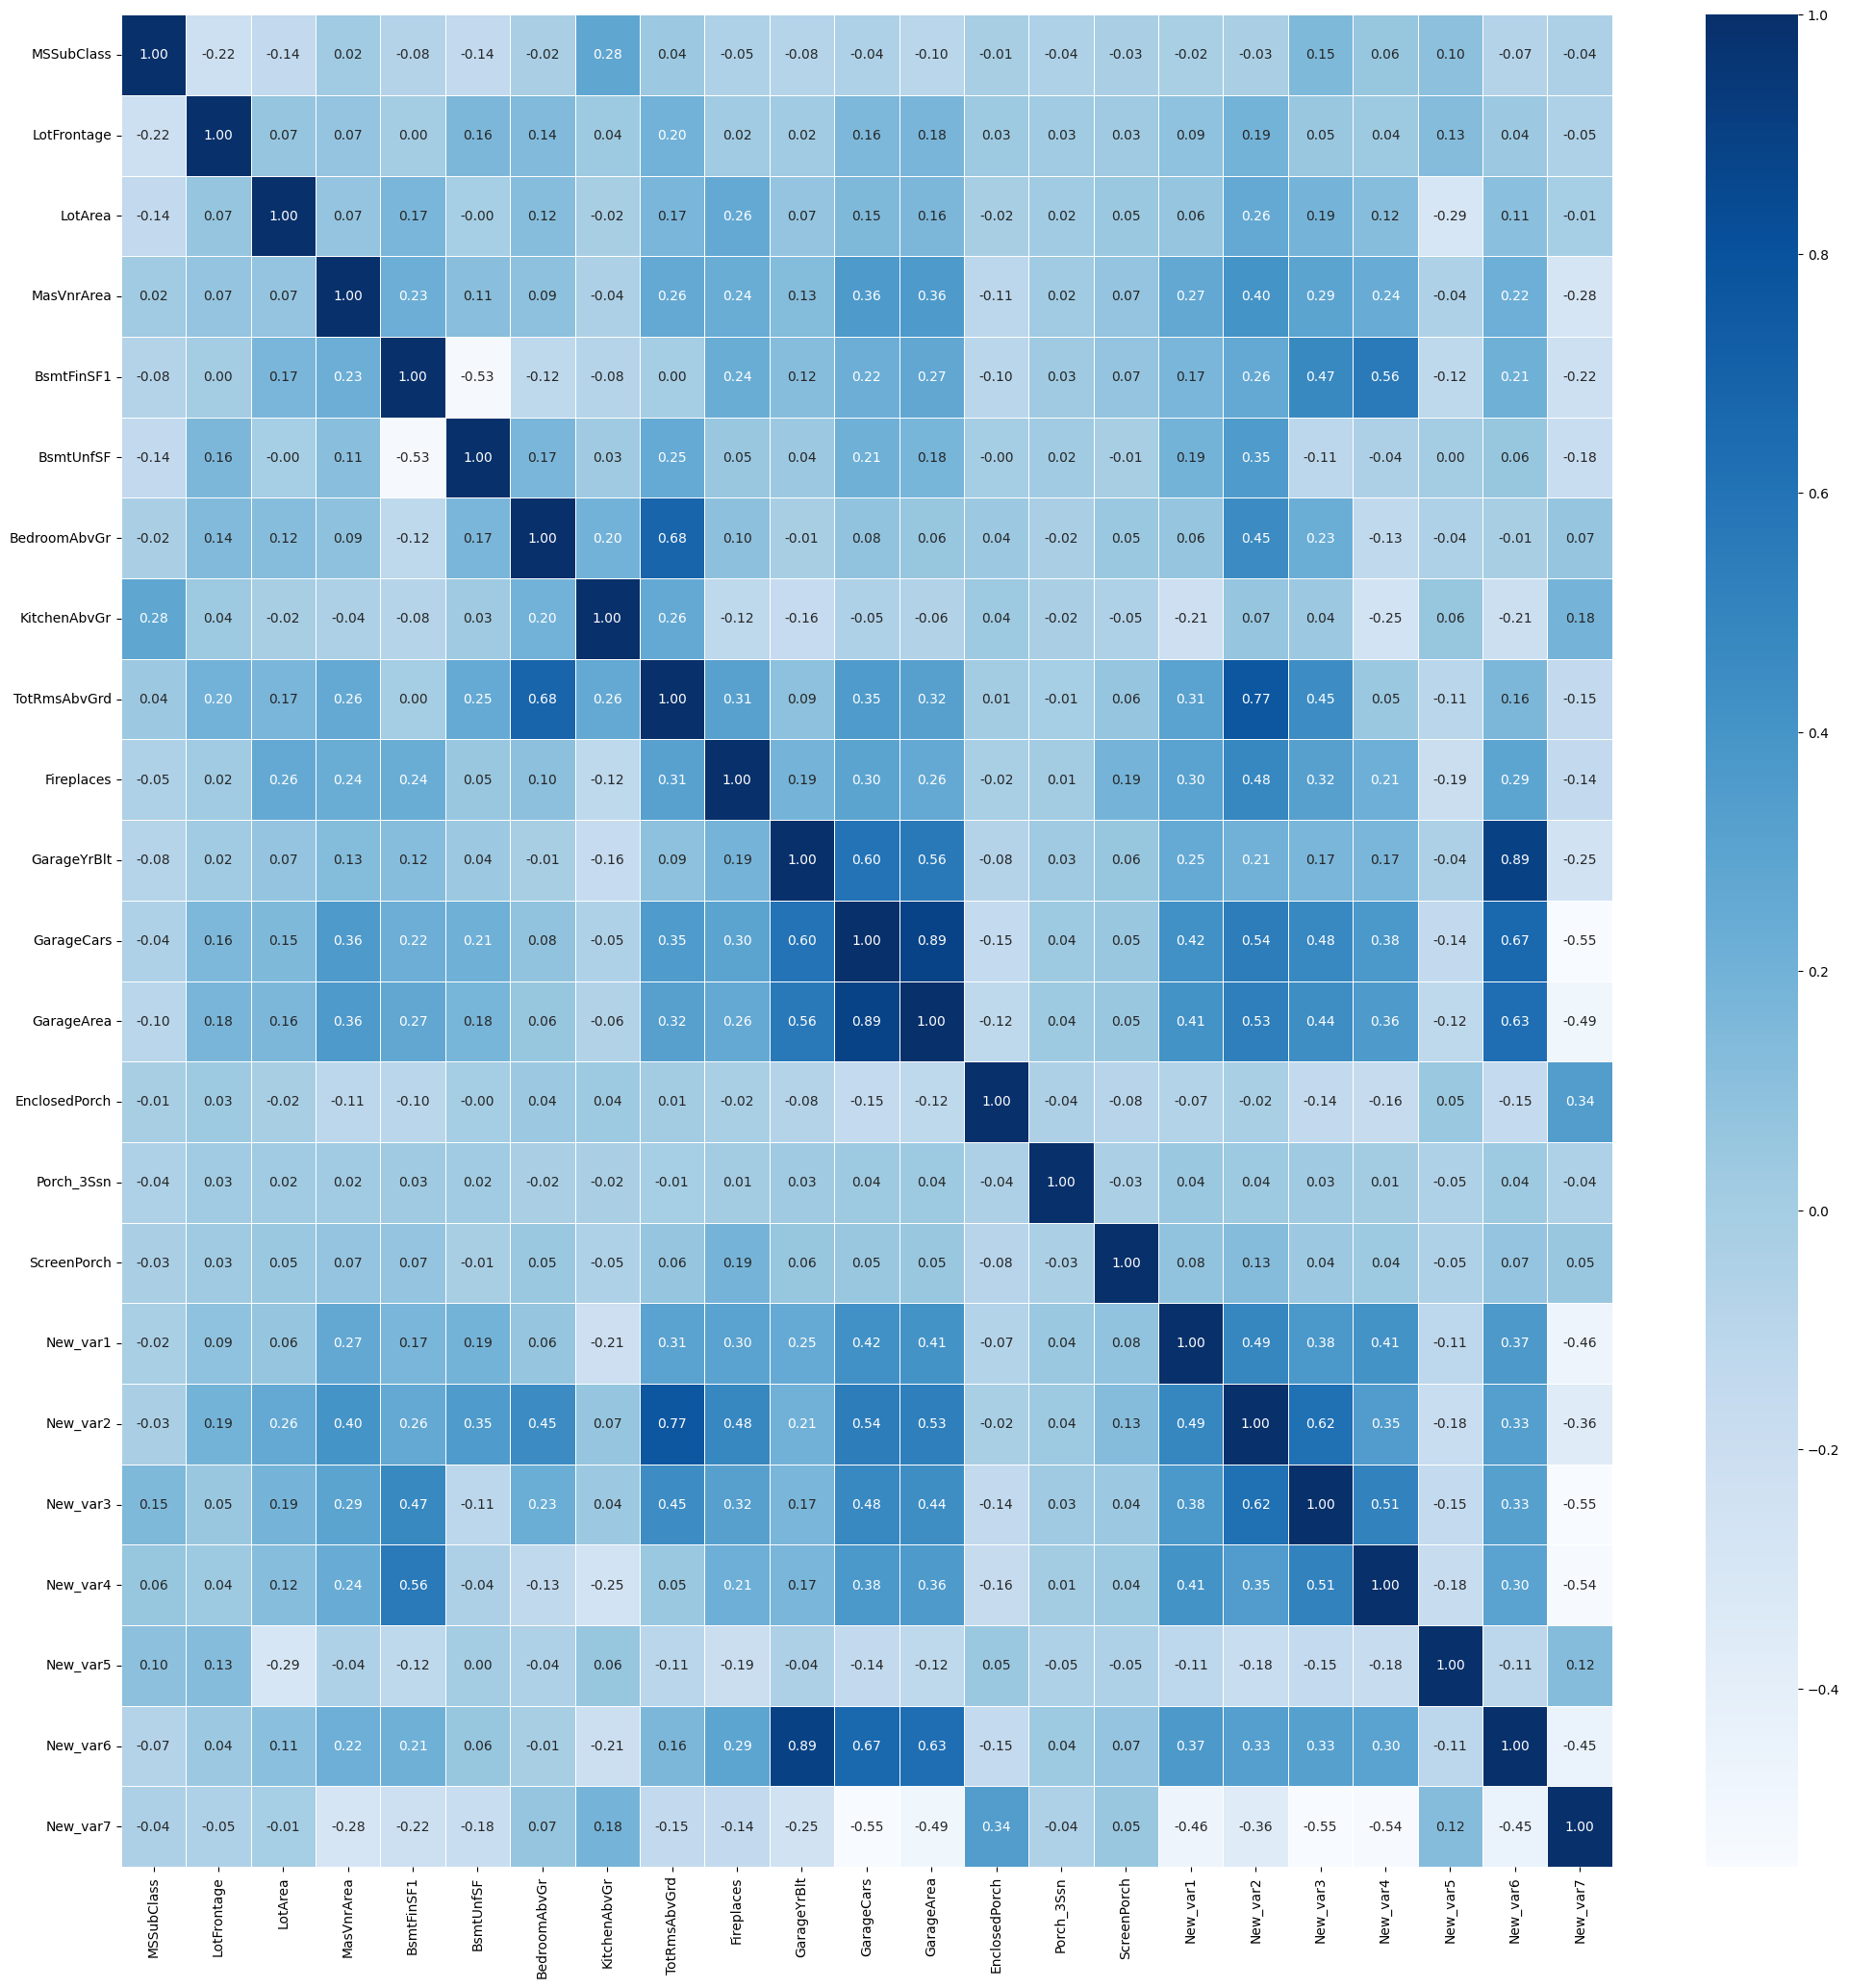

In [143]:
plt.figure(figsize=(25,25))
sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 생성
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(train_df)

# 선형 회귀 모델 학습
poly_regression = LinearRegression()
poly_regression.fit(X_poly, train_target)

# 예측
X_test_poly = poly_features.transform(test_df)
y_pred = poly_regression.predict(X_test_poly)

In [227]:
# y_pred = lr_model.predict(train_df)
# r2 = r2_score(train_target, y_pred)
# print('R-sqaure:', r2)

k = 10
scores = -cross_val_score(poly_regression, train_df, train_target, cv=k, scoring='neg_mean_squared_error')

# RMSE 계산
rmse = np.sqrt(scores.mean())

print(f'Average RMSE: {rmse}')

Average RMSE: 0.12965968212150564


In [228]:
# predict = lr_model.predict(test_df[train_cols])
predict = np.exp(y_pred)
result =pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_poly.csv', index=False)

### VIF

In [158]:
train_cols = list(train_df.columns)

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = train_df.columns
vif["VIF Factor"] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
vif.sort_values(by='VIF Factor', ascending=False).round(1)

,features,VIF Factor
10,GarageYrBlt,119.3
21,New_var6,107.6
17,New_var2,86.9
8,TotRmsAbvGrd,78.5
16,New_var1,69.2
11,GarageCars,39.9
19,New_var4,31.8
12,GarageArea,30.7
7,KitchenAbvGr,29.7
6,BedroomAbvGr,28.1


In [162]:
train_cols = list(train_df.columns)
count = 0
while True:
    vif = pd.DataFrame()
    vif['features'] = train_cols
    vif["VIF Factor"] = [variance_inflation_factor(train_df[train_cols].values, i) for i in range(train_df[train_cols].shape[1])]
    vif = vif.sort_values(by='VIF Factor', ascending=False).round(1)
    count += 1
    if vif['VIF Factor'].max() > 10:
        print(f'{count}번째 loop')
        print(f'제거할 컬럼명: {vif.iloc[0,0]}, VIF: {vif.iloc[0,1]}')
        train_cols.remove(vif.iloc[0,0])
        print(train_cols)
    else:
        break

1번째 loop
제거할 컬럼명: GarageYrBlt, VIF: 119.3
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'EnclosedPorch', 'Porch_3Ssn', 'ScreenPorch', 'New_var1', 'New_var2', 'New_var3', 'New_var4', 'New_var5', 'New_var6', 'New_var7']
2번째 loop
제거할 컬럼명: New_var2, VIF: 86.7
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'EnclosedPorch', 'Porch_3Ssn', 'ScreenPorch', 'New_var1', 'New_var3', 'New_var4', 'New_var5', 'New_var6', 'New_var7']
3번째 loop
제거할 컬럼명: New_var1, VIF: 68.5
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'EnclosedPorch', 'Porch_3Ssn', 'ScreenPorch', 'New_var3', 'New_var4', 'New_var5', 'New_var6', 'New_var7']
4번째 loop
제거할

In [163]:
train_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Fireplaces',
 'GarageArea',
 'EnclosedPorch',
 'Porch_3Ssn',
 'ScreenPorch',
 'New_var5',
 'New_var7']

## ensemble

In [176]:
# ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Lasso
lasso = Lasso(alpha=1.0)

# Linear Regression
linear = LinearRegression()

# Ridge
ridge = Ridge(alpha=0.5)

# Soft Voting
voting_regressor = VotingRegressor(estimators=[
    ('elastic_net', elastic_net),
    ('lasso', lasso),
    ('linear_regression', linear),
    ('ridge', ridge)
])

scores = cross_val_score(voting_regressor, train_df[train_cols], train_target, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE Score:", np.mean(rmse_scores))

Cross-Validation RMSE Scores: [0.14256677 0.11944299 0.12394406 0.14235383 0.155364   0.12327599
 0.13587783 0.12836282 0.13321627 0.13719917]
Average RMSE Score: 0.13416037372284267


In [178]:
voting_regressor.fit(train_df[train_cols], train_target)

predict = voting_regressor.predict(test_df[train_cols])
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_ensemble2.csv', index=False)

In [94]:
predict = Lasso.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predict
})
result.to_csv('result_Lasso1.csv', index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [ ]:
GBoost = GradientBoostingRegressor()
GBoost.fit(train_df, train_target)

GradientBoostingRegressor()

In [ ]:
predict = GBoost.predict(test_df)
predict = np.exp(predict)
result =pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_GBoost.csv', index=False)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB = XGBRegressor()
XGB.fit(train_df, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
predict = XGB.predict(test_df)
predict = np.exp(predict)
result = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predict
})
result.to_csv('result_XGB.csv', index=False)